# Step 2: Feature Engineering for Customer Segmentation

This notebook creates customer-level features from the cleaned retail dataset to support customer segmentation analysis.


## Objectives

1. Create aggregated features at the customer level  
2. Handle outliers in the data  
3. Apply transformations to normalize feature distributions  
4. Standardize features for clustering  
5. Save the processed features for modeling  

The goal is to generate meaningful features that capture different aspects of customer purchasing behavior.


In [1]:
%load_ext autoreload
%autoreload 2

# Import necessary libraries
import sys
sys.path.append('C:/Users/HP/Downloads/e_commerce_Dataset/e_commerce_project/src')

from clustering_library import FeatureEngineer
import matplotlib.pyplot as plt
import seaborn as sns

# setting style for matplotlib and seaborn
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Cleaned Data


In [2]:
# load data NA cleaned
data_path = "C:/Users/HP/Downloads/e_commerce_Dataset/data/processed/cleaned_na_data.csv"

# create Feature instance and load data
engineer = FeatureEngineer(data_path)
df = engineer.load_data()

display(df.head())

Data size: (19176, 15)


,event_id,event_date,customer_id,product_id,product_name,vendor_name,country_name,region,quantity,unit_price_local,net_revenue_local,discount_local,is_refunded,DayOfWeek,HourOfDay
0,DDF4B24A8C91,2025-06-21 10:03:00,CUST0003443,PROD0065,Microsoft Copilot for Office Monthly,Microsoft,Canada,NaN,1,19.0,19.95,0.0,False,5,10
1,BD9FEBEC9B3F,2025-05-05 09:33:00,CUST0002954,PROD0018,GitHub Copilot Business Annual,GitHub,United States,NaN,5,228.0,1140.00,0.0,False,0,9
2,CA766F5D217C,2024-09-09 04:59:00,CUST0000463,PROD0007,Team Seats Addâon Monthly,Other,United States,NaN,1,9.0,9.00,0.0,False,0,4
3,91C029DA41E7,2025-09-07 03:01:00,CUST0002656,PROD0041,Canva Pro Monthly,Canva,United States,NaN,5,12.0,60.00,0.0,False,6,3
4,FD1255BBCA9C,2025-05-24 15:45:00,CUST0001734,PROD0042,Canva Pro Annual,Canva,United States,NaN,10,120.0,1200.00,0.0,False,5,15


In [3]:
print(f"Total number of features to be created: {len(engineer.feature_customer)}")
print("Feature list:")
for i, feature in enumerate(engineer.feature_customer, 1):
    print(f"{i:2d}. {feature}")


Total number of features to be created: 16
Feature list:
 1. Discount_Affinity
 2. AOV
 3. Recency
 4. Count_Orders
 5. Count_Products
 6. Sum_Quantity
 7. Mean_UnitPrice
 8. Mean_QuantityPerOrder
 9. Avg_UnitPricePerProduct
10. Avg_QuantityPerProduct
11. Avg_TotalPricePerProduct
12. Avg_TotalPricePerInvoice
13. Max_Avg_Order_Value
14. Min_Avg_Order_Value
15. Max_Total_Order_Value
16. Min_Total_Order_Value


## Create Customer-Level Features


In [4]:
# customer-level features
customer_features = engineer.create_customer_features()
customer_features.head()

Calculating features for each customer...
Processed 500/1628 customers...
Processed 1000/1628 customers...
Processed 1500/1628 customers...
Feature calculation completed!


,customer_id,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value
0,CUST0000005,0.300000,242.768000,192.0,10.0,9.0,36.0,121.584000,3.600000,102.871111,4.000000,269.742222,242.768000,242.768000,242.768000,1000.00,9.00
1,CUST0000006,0.428571,1011.917857,36.0,14.0,13.0,125.0,154.908571,8.928571,128.440000,9.615385,1089.757692,1011.917857,1011.917857,1011.917857,7250.00,18.92
2,CUST0000009,0.454545,1097.982727,60.0,11.0,10.0,52.0,185.853636,4.727273,154.539000,5.200000,1207.781000,1097.982727,1097.982727,1097.982727,7110.75,32.40
3,CUST0000011,0.285714,467.169286,33.0,14.0,14.0,77.0,49.797143,5.500000,49.797143,5.500000,467.169286,467.169286,467.169286,467.169286,5348.00,9.88
4,CUST0000013,0.750000,115.500000,184.0,4.0,4.0,12.0,30.750000,3.000000,30.750000,3.000000,115.500000,115.500000,115.500000,115.500000,357.00,4.50


### **Feature Description**

The **12 customer-level features** reflect purchasing behavior and customer value:

#### **Overall Customer Metrics:**
1. **`Discount_Affinity`**: Sensitivity to discounts (value between 0–1)  
2. **`AOV`**: Average Order Value – average value per order  
3. **`Count_Orders`**: Total number of orders by the customer  
4. **`Count_Products`**: Number of distinct products purchased  
5. **`Sum_Quantity`**: Total quantity of products purchased  

#### **Order-Level Averages:**
6. **`Mean_UnitPrice`**: Average unit price of purchased products  
7. **`Mean_QuantityPerOrder`**: Average quantity per order  

#### **Product-Level Aggregates:**
8. **`Mean_UnitPriceMeanPerProduct`**: Average unit price per product (averaged across products)  
9. **`Mean_QuantitySumPerProduct`**: Average total quantity per product  
10. **`Mean_TotalPriceSumPerProduct`**: Average total spend per product  

#### **Invoice-Level Aggregates:**
11. **`Mean_TotalPriceSumPerInvoice`**: Average total spend per invoice  

#### **Customer Activity Metrics:**
12. **`Recency`**: Number of days since the customer’s last purchase (based on the most recent event date + 1 day)

---

These features provide a comprehensive view of each customer’s purchasing behavior, supporting segmentation and predictive modeling of customer value.


In [5]:
# Display summary statistics of created features
print("Features created successfully:")
print(f"- Number of customers: {customer_features.shape[0]:,}")
print(f"- Number of features: {customer_features.shape[1] - 1}")

customer_features.set_index('customer_id').describe().round(2)


Features created successfully:
- Number of customers: 1,628
- Number of features: 16


,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value
count,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00,1628.00
mean,0.35,601.37,45.01,11.78,11.14,71.05,104.90,6.04,105.09,6.40,637.18,601.37,601.37,601.37,2950.45,18.74
std,0.14,325.03,43.90,3.44,3.21,29.14,33.70,1.86,33.03,2.05,351.20,325.03,325.03,325.03,1875.95,24.33
min,0.00,49.03,1.00,3.00,3.00,3.00,18.07,1.00,18.07,1.00,49.03,49.03,49.03,49.03,136.50,4.00
25%,0.25,361.43,13.00,9.00,9.00,50.00,81.93,4.78,82.50,5.00,379.59,361.43,361.43,361.43,1497.00,8.75
50%,0.33,551.21,32.00,12.00,11.00,69.00,103.00,5.94,103.37,6.26,579.39,551.21,551.21,551.21,2600.50,12.40
75%,0.44,781.95,62.00,14.00,13.00,90.00,125.63,7.14,126.55,7.61,827.57,781.95,781.95,781.95,4040.72,19.63
max,0.86,2218.81,349.00,24.00,23.00,197.00,241.81,14.50,223.20,15.50,2942.32,2218.81,2218.81,2218.81,13098.75,316.27


## Feature Transformation

To prepare features for clustering, we apply the Box-Cox transformation to normalize feature distributions.


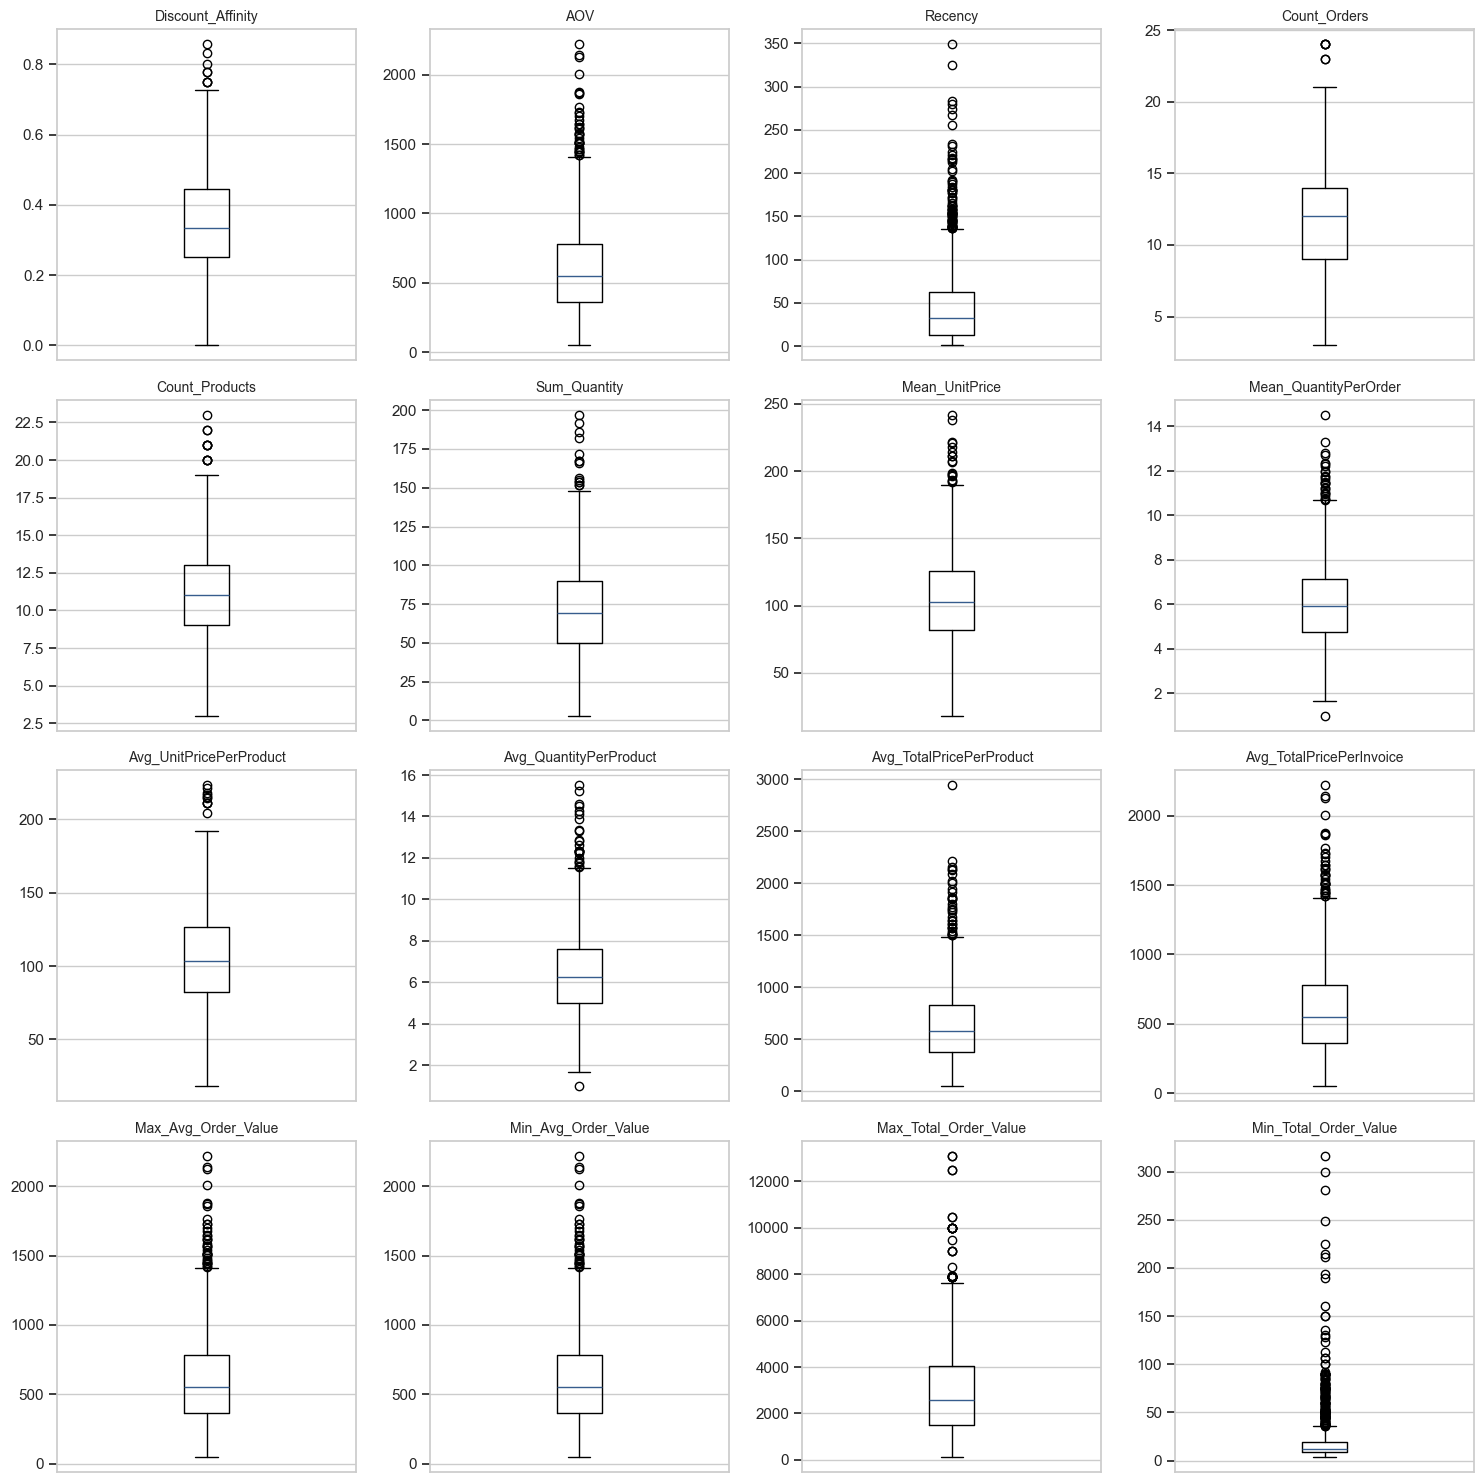

In [6]:
# feature visualization - boxplots before transformation
engineer.plot_features_boxplots(transformed=False)

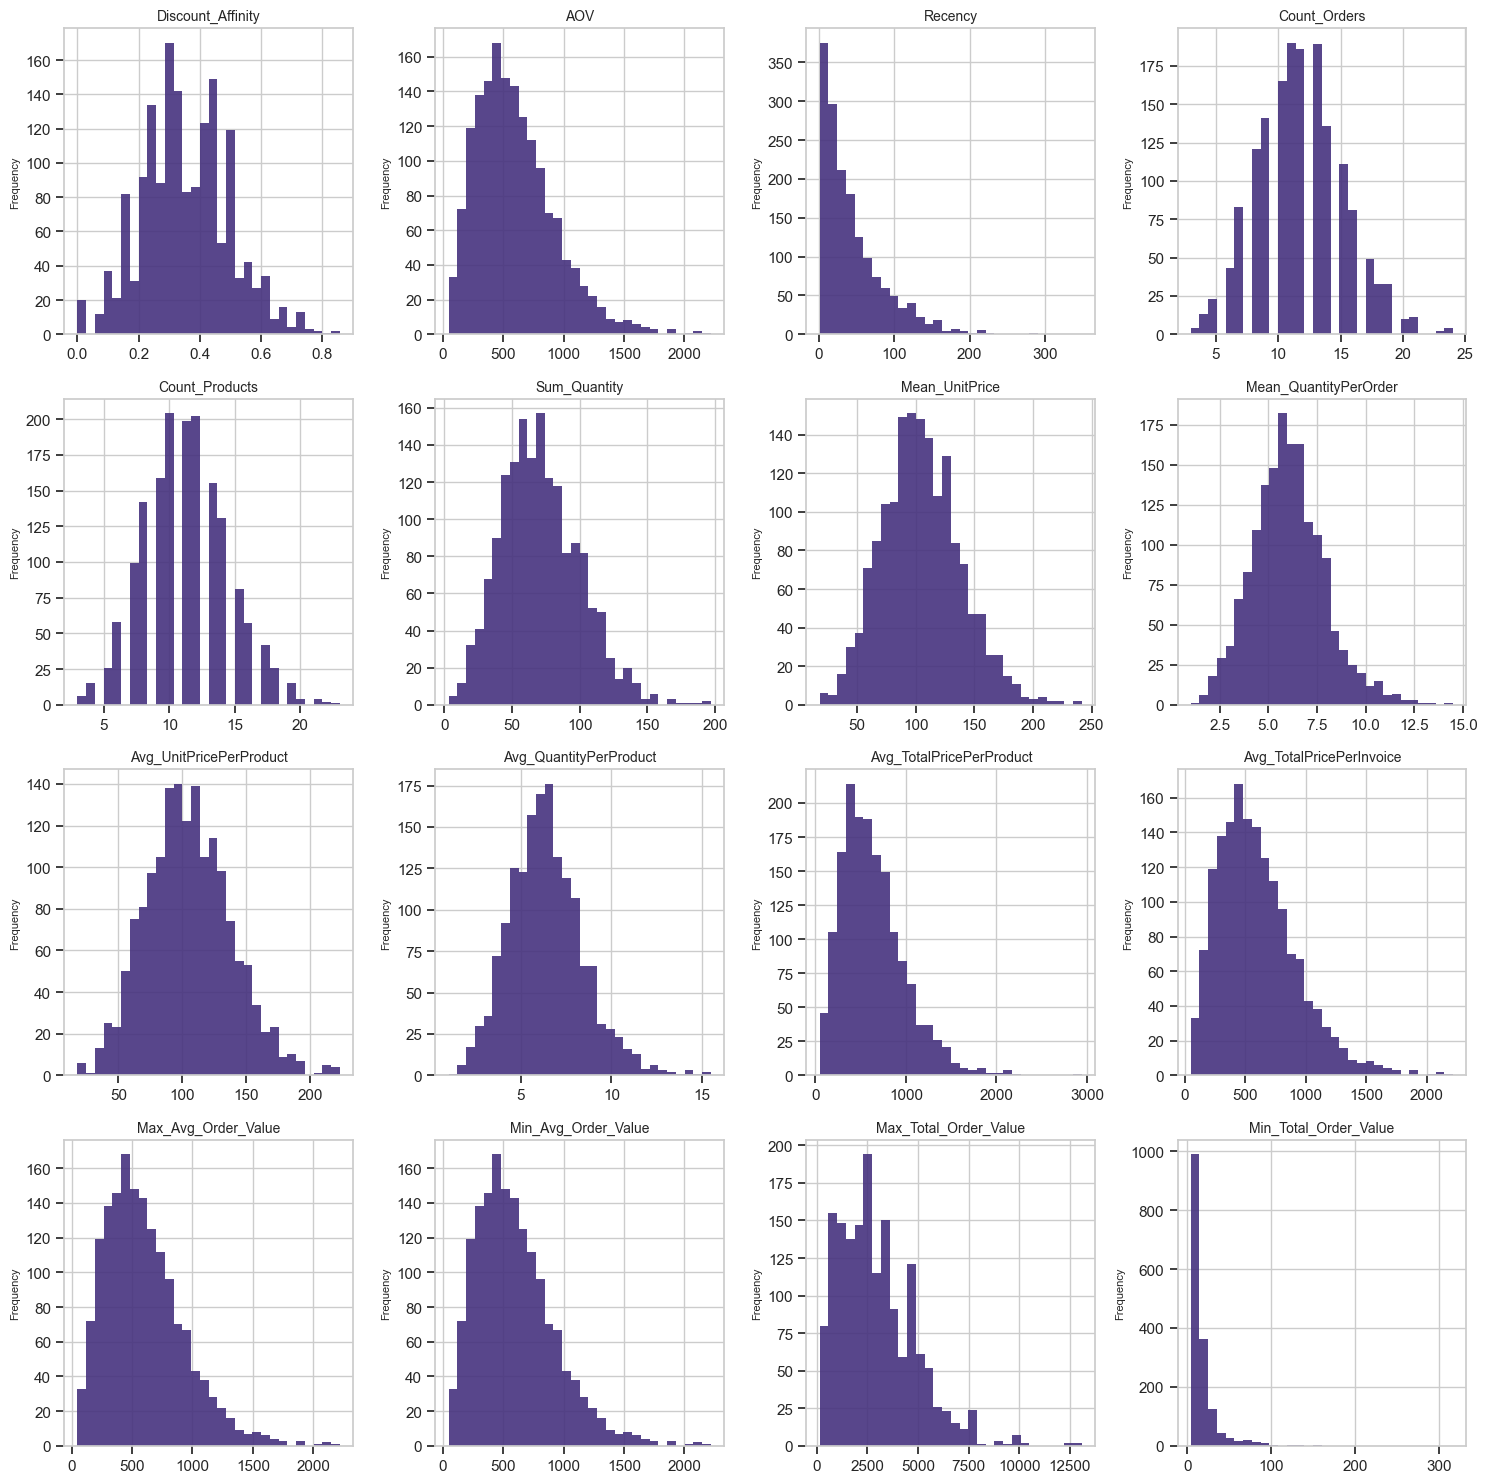

In [7]:
engineer.plot_features_histograms(transformed=False)

In [8]:
# Apply Box-Cox transformation to normalize feature distributions
customer_features_transformed = engineer.transform_features()
customer_features_transformed.head()

Applying Box-Cox transformation
Box-Cox transformation completed!


,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value
customer_id,,,,,,,,,,,,,,,,
CUST0000005,0.275225,15.848502,9.267627,5.705702,5.436977,12.262569,32.079123,2.286189,32.332821,2.325037,15.441563,15.848502,15.848502,15.848502,33.340052,1.324776
CUST0000006,0.380720,27.375148,5.273413,7.306437,7.173733,26.730511,37.654142,4.292000,37.731873,4.108879,25.752547,27.375148,27.375148,27.375148,73.381053,1.493266
CUST0000009,0.401288,28.216601,6.347725,6.123088,5.890249,15.501509,42.453296,2.781633,42.892594,2.776975,26.708158,28.216601,28.216601,28.216601,72.826226,1.584603
CUST0000011,0.263098,20.454214,5.102000,7.306437,7.580308,19.825555,17.619702,3.093351,19.410491,2.882006,18.962170,20.454214,20.454214,20.454214,65.127655,1.348878
CUST0000013,0.620315,11.719272,9.148106,2.820146,2.877170,5.903969,12.651994,1.997382,13.744300,1.898571,11.084223,11.719272,11.719272,11.719272,21.757662,1.118929


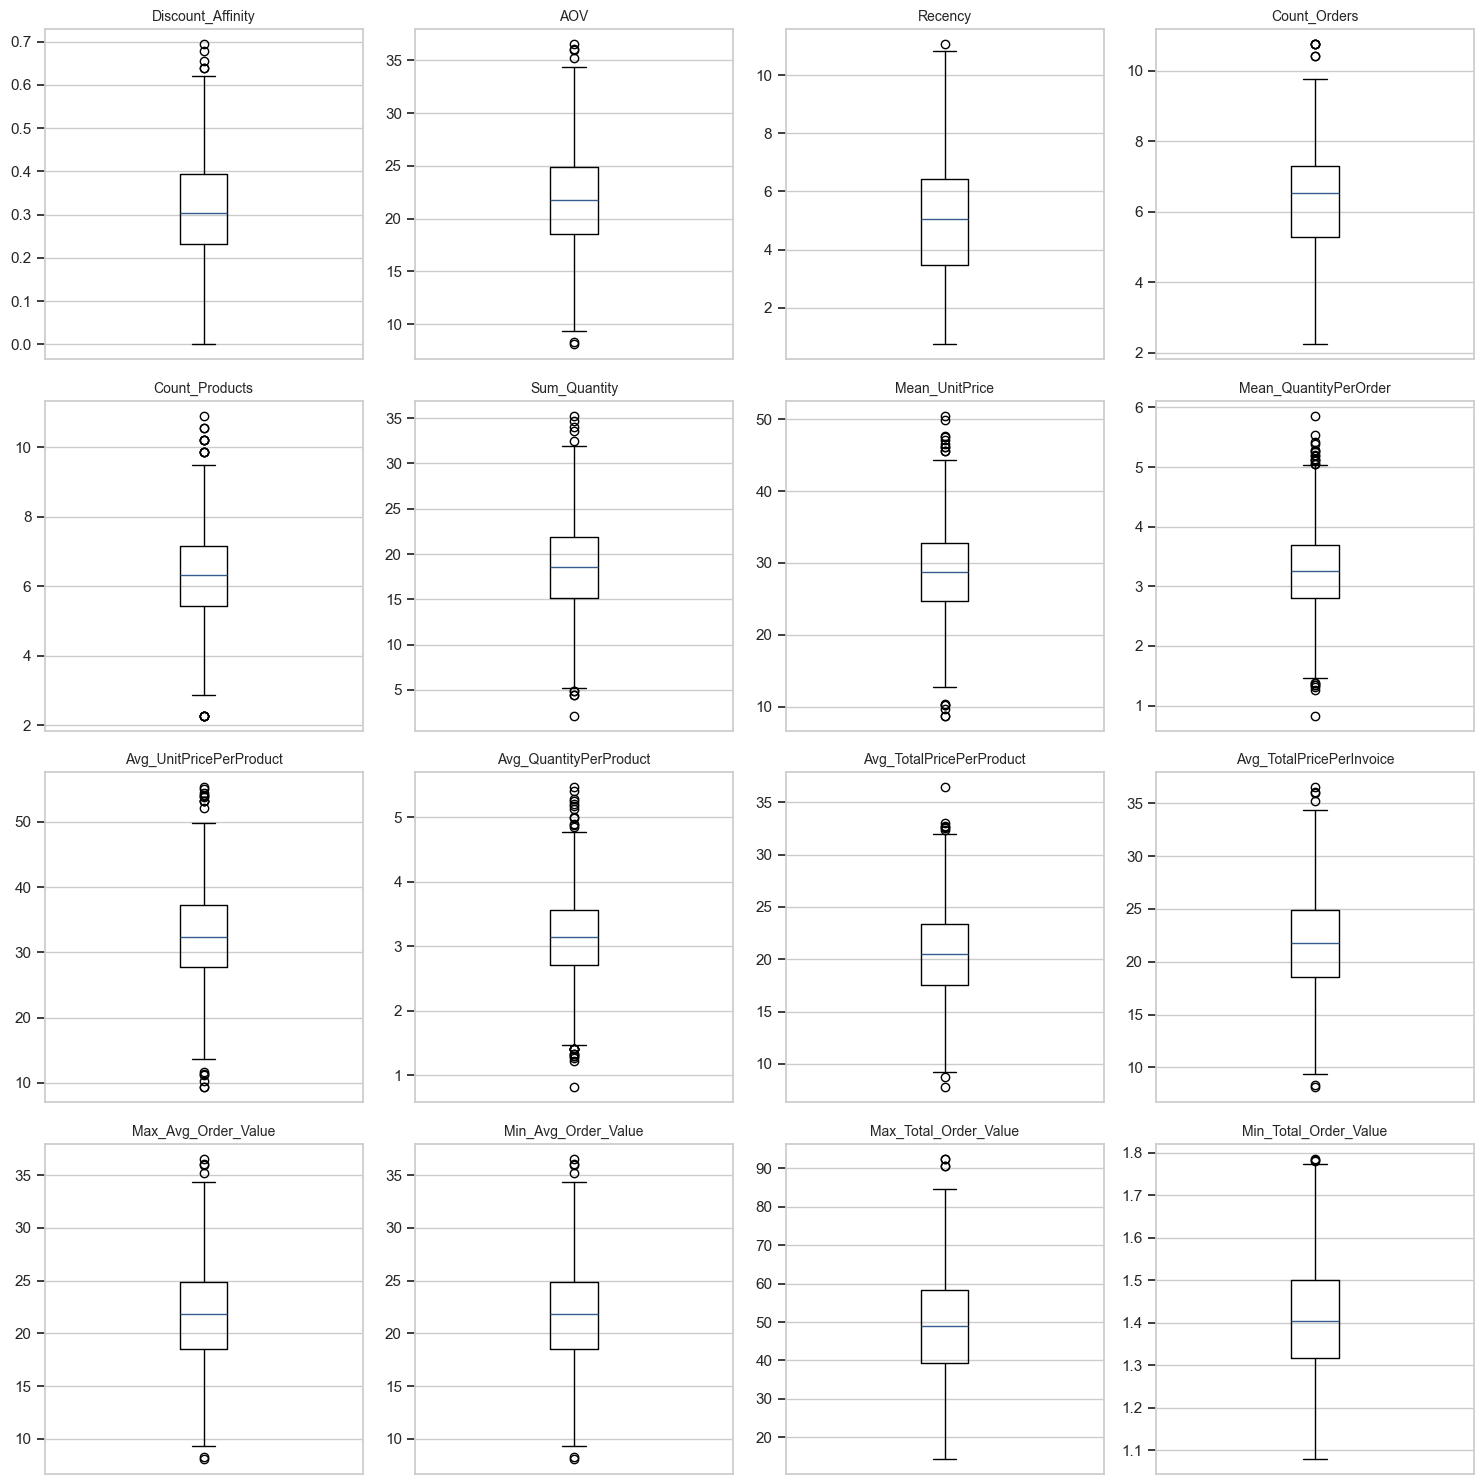

In [9]:
# feature visualization - boxplots before transformation
engineer.plot_features_boxplots(transformed=True)

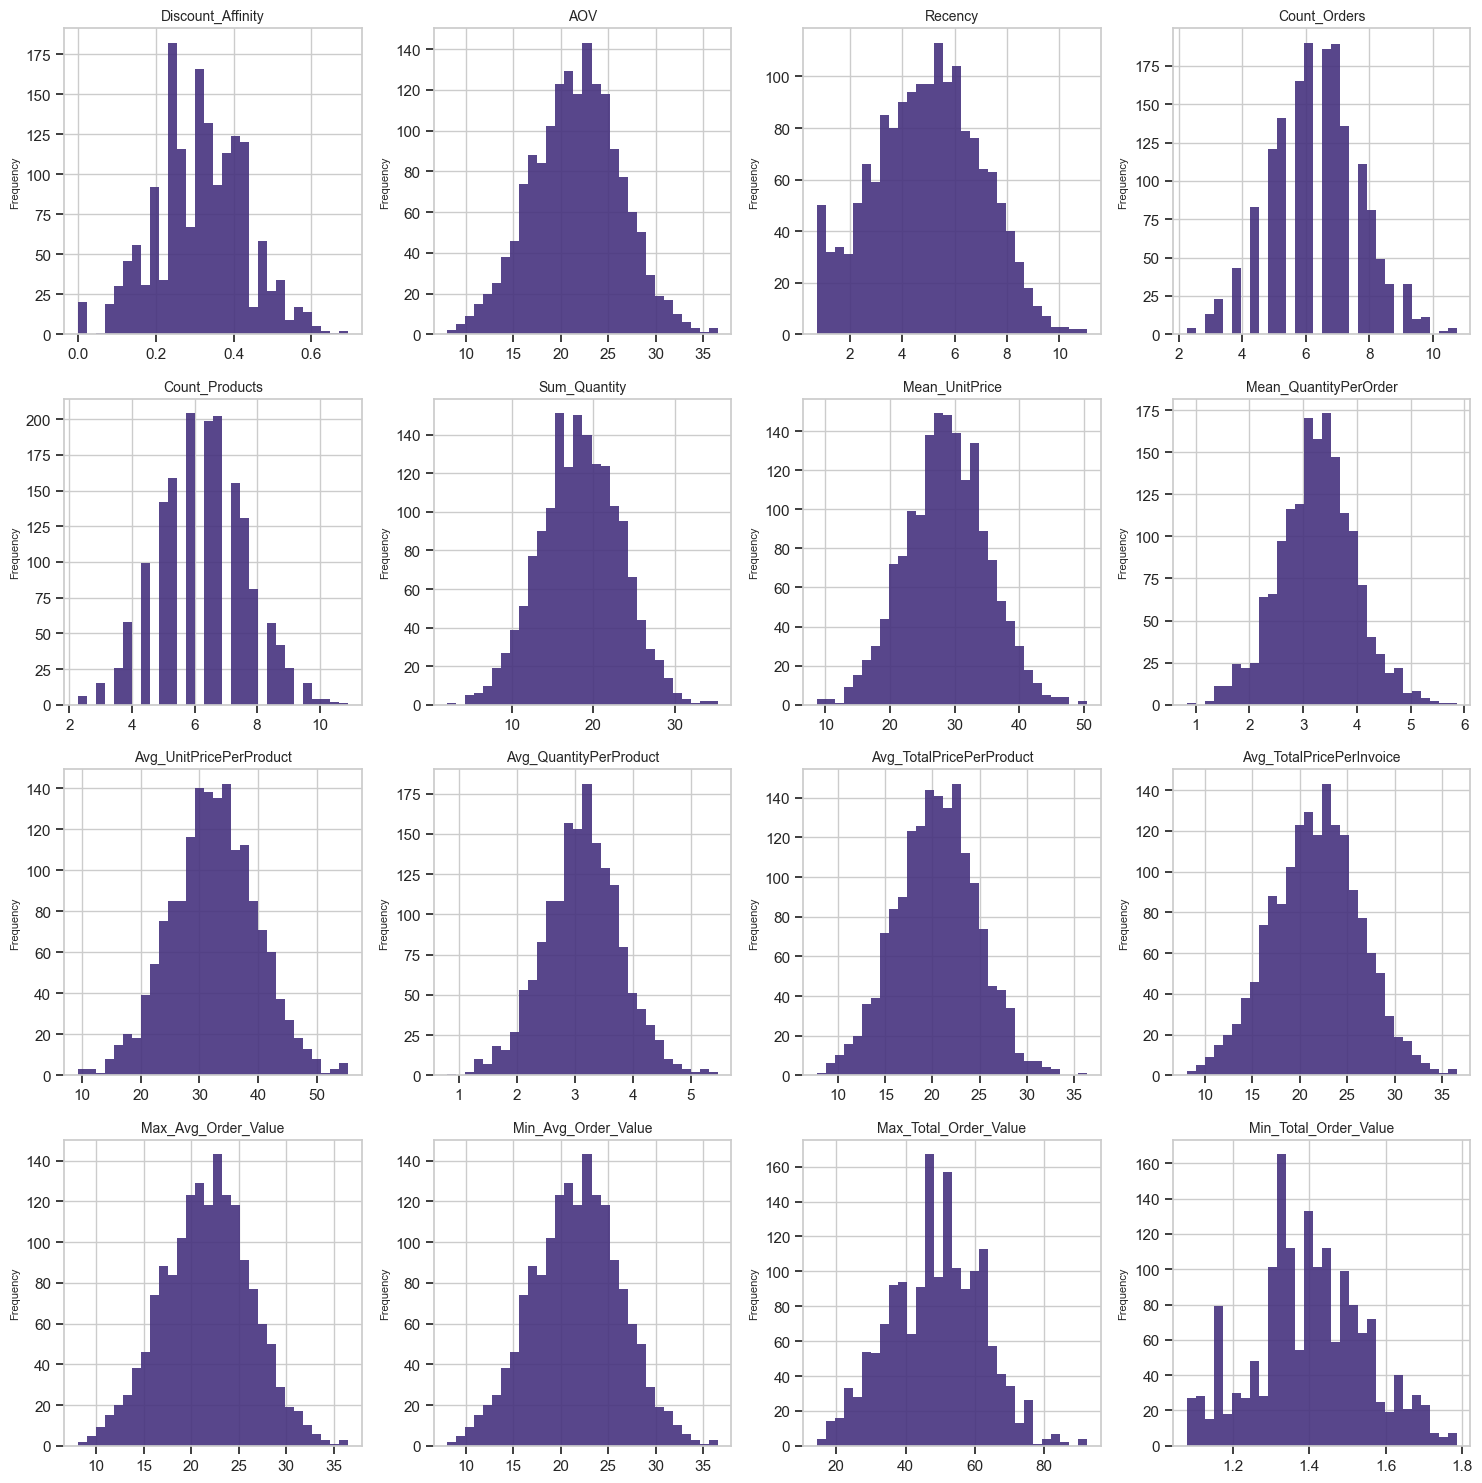

In [10]:
engineer.plot_features_histograms(transformed=True)

## Feature Standardization


In [11]:
# standardization (mean=0, std=1)
customer_features_scaled = engineer.scale_features()
print(f"Shape of standardized features: {customer_features_scaled.shape}")
# display(customer_features_scaled.describe().round(2).loc[['mean', 'std']])
customer_features_scaled.head()

Feature scaling completed!
Shape of standardized features: (1628, 16)


,Discount_Affinity,AOV,Recency,Count_Orders,Count_Products,Sum_Quantity,Mean_UnitPrice,Mean_QuantityPerOrder,Avg_UnitPricePerProduct,Avg_QuantityPerProduct,Avg_TotalPricePerProduct,Avg_TotalPricePerInvoice,Max_Avg_Order_Value,Min_Avg_Order_Value,Max_Total_Order_Value,Min_Total_Order_Value
customer_id,,,,,,,,,,,,,,,,
CUST0000005,-0.342904,-1.258313,2.104404,-0.478164,-0.640614,-1.260613,0.536856,-1.376552,-0.014524,-1.219036,-1.176896,-1.258313,-1.258313,-1.258313,-1.163242,-0.521976
CUST0000006,0.560477,1.226716,0.147444,0.671752,0.606361,1.697625,1.425995,1.481110,0.730477,1.489409,1.249130,1.226716,1.226716,1.226716,1.849680,0.639925
CUST0000009,0.736608,1.408125,0.673802,-0.178327,-0.315169,-0.598352,2.191394,-0.670697,1.442591,-0.532849,1.473972,1.408125,1.408125,1.408125,1.807931,1.269776
CUST0000011,-0.446744,-0.265368,0.063461,0.671752,0.898279,0.285779,-1.769221,-0.226596,-1.797642,-0.373378,-0.348548,-0.265368,-0.265368,-0.265368,1.228645,-0.355769
CUST0000013,2.612192,-2.148533,2.045845,-2.551054,-2.478534,-2.560745,-2.561502,-1.788014,-2.579505,-1.866548,-2.202116,-2.148533,-2.148533,-2.148533,-2.034770,-1.941487


## Save Processed Features


In [12]:
# Save the processed features for clustering
engineer.save_features()

print("Summary of results:")
print(f"- Total number of customers: {customer_features_scaled.shape[0]:,}")
print(f"- Total number of features: {customer_features_scaled.shape[1]}")
print("- Saved files:")
print("  + customer_features.csv: Original features")
print("  + customer_features_transformed.csv: Box-Cox transformed features")
print("  + customer_features_scaled.csv: Standardized features (ready for clustering)")


All features have been saved to: ../data/processed
Summary of results:
- Total number of customers: 1,628
- Total number of features: 16
- Saved files:
  + customer_features.csv: Original features
  + customer_features_transformed.csv: Box-Cox transformed features
  + customer_features_scaled.csv: Standardized features (ready for clustering)


## Feature Engineering Summary


**Feature Creation**
- Created 16 customer-level features to describe purchasing behavior.  
- Features are aggregated from transaction data for each customer.  
- Includes:  
  - **Basic metrics**: Purchase count, average spend, number of orders, number of products, discount sensitivity  
  - **Invoice-level aggregates**: Average total spend per transaction  
  - **Product-level aggregates**: Average unit price, average quantity, and average total spend per product  

**Data Transformation**
- Applied Box-Cox transformation to normalize feature distributions  
- Standardized features to have mean = 0 and variance = 1 using StandardScaler  

**Output Files**
- `customer_features.csv`: Original aggregated features  
- `customer_features_transformed.csv`: Box-Cox transformed features  
- `customer_features_scaled.csv`: Standardized features (ready for clustering)  
